In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the datasets
features_df = pd.read_csv('./Data/features.csv')
train_df = pd.read_csv('./Data/train.csv')
stores_df = pd.read_csv('./Data/stores.csv')
test_df = pd.read_csv('./Data/test.csv')


In [3]:

# Merge the datasets for training
data = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
data = pd.merge(data, stores_df, on='Store', how='left')


In [4]:
# Show the first five:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [5]:
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])


In [7]:
# Feature engineering
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['IsHoliday'] = data['IsHoliday'].astype(int)
data['Week'] = data['Date'].dt.isocalendar().week
data['Quarter'] = data['Date'].dt.quarter
data['Is_Weekend'] = (data['DayOfWeek'] >= 5).astype(int)

In [8]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Type'])

In [9]:
# Checking missing values:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Size                 0
Year                 0
Month                0
Day                  0
DayOfWeek            0
Week                 0
Quarter              0
Is_Weekend           0
Type_A               0
Type_B               0
Type_C               0
dtype: int64

In [10]:

# Handle missing values by replacing all with 0:
data = data.fillna(0)

In [11]:

# Prepare features and target
X = data.drop(['Weekly_Sales', 'Date'], axis=1)
y = data['Weekly_Sales']

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Year,Month,Day,DayOfWeek,Week,Quarter,Is_Weekend,Type_A,Type_B,Type_C
138466,15,3,0,30.34,3.811,0.00,0.0,0.00,0.00,0.00,...,2011,4,1,4,13,2,0,False,True,False
289214,30,25,0,83.51,2.668,0.00,0.0,0.00,0.00,0.00,...,2010,6,11,4,23,2,0,False,False,True
52351,6,27,0,79.44,2.705,0.00,0.0,0.00,0.00,0.00,...,2010,6,4,4,22,2,0,True,False,False
203504,21,49,0,48.72,3.172,3389.10,43.0,1258.32,325.35,8623.67,...,2011,12,2,4,48,4,0,False,True,False
233606,24,55,0,32.86,3.585,7325.68,25367.9,203.51,1745.20,3261.35,...,2012,1,6,4,1,1,0,True,False,False


In [14]:
X_test.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Year,Month,Day,DayOfWeek,Week,Quarter,Is_Weekend,Type_A,Type_B,Type_C
272342,28,40,0,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,...,2012,1,6,4,1,1,0,True,False,False
176581,18,93,0,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,...,2012,3,9,4,10,1,0,False,True,False
354212,38,4,0,76.67,4.087,0.00,0.00,0.00,0.00,0.00,...,2011,5,27,4,21,2,0,False,False,True
281444,29,33,0,43.43,2.805,0.00,0.00,0.00,0.00,0.00,...,2010,3,12,4,10,1,0,False,True,False
124208,13,52,0,45.12,2.841,0.00,0.00,0.00,0.00,0.00,...,2010,10,29,4,43,4,0,True,False,False


In [ ]:
y_test['']

In [14]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R2 Score: {r2}")
    print()

In [16]:
# Define a smaller parameter grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Convert data types to save memory
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Create a smaller subset of the data for hyperparameter tuning
subset_size = min(10000, len(X_train))  # Use at most 10,000 samples or the full dataset if smaller
random_indices = np.random.choice(len(X_train), subset_size, replace=False)
X_train_subset = X_train_scaled[random_indices]
y_train_subset = y_train.iloc[random_indices]

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the RandomizedSearchCV with reduced parallelism and increased verbosity
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params,
                               n_iter=20, cv=3, verbose=3, random_state=42, n_jobs=2)

# Fit the model on the subset
rf_random.fit(X_train_subset, y_train_subset)

# Get the best model
best_rf_model = rf_random.best_estimator_

# Retrain the best model on the full dataset
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model(y_test, rf_pred, "Random Forest (Tuned)")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest (Tuned) Results:
Root Mean Squared Error: 3438.723930032558
R2 Score: 0.977324103490929



In [17]:
# Cross-validation
rf_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("Random Forest Cross-Validation RMSE:", np.sqrt(-rf_scores.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Random Forest Cross-Validation RMSE: 3583.6446934277756


In [18]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 important features:")
print(feature_importance.head(10))


Top 10 important features:
         feature  importance
1           Dept    0.628638
12          Size    0.192325
0          Store    0.056467
17          Week    0.037589
10           CPI    0.025520
11  Unemployment    0.010726
21        Type_B    0.010627
3    Temperature    0.008616
15           Day    0.007651
14         Month    0.006041


In [19]:
# Prepare test data for predictions
test_data = pd.merge(test_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
test_data = pd.merge(test_data, stores_df, on='Store', how='left')

test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month
test_data['Day'] = test_data['Date'].dt.day
test_data['DayOfWeek'] = test_data['Date'].dt.dayofweek
test_data['IsHoliday'] = test_data['IsHoliday'].astype(int)
test_data['Week'] = test_data['Date'].dt.isocalendar().week
test_data['Quarter'] = test_data['Date'].dt.quarter
test_data['Is_Weekend'] = (test_data['DayOfWeek'] >= 5).astype(int)
test_data = pd.get_dummies(test_data, columns=['Type'])

In [20]:
# Ensure test data has the same columns as training data
for col in X.columns:
    if col not in test_data.columns:
        test_data[col] = 0

test_data = test_data[X.columns]

In [21]:
# checking for missing values:
test_data.isnull().sum()

Store               0
Dept                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Size                0
Year                0
Month               0
Day                 0
DayOfWeek           0
Week                0
Quarter             0
Is_Weekend          0
Type_A              0
Type_B              0
Type_C              0
dtype: int64

In [22]:
# Impute missing values by replacing all with 0:
test_data = test_data.fillna(0)

In [23]:
test_data.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Year,Month,Day,DayOfWeek,Week,Quarter,Is_Weekend,Type_A,Type_B,Type_C
0,1,1,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,...,2012,11,2,4,44,4,0,True,False,False
1,1,1,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,...,2012,11,9,4,45,4,0,True,False,False
2,1,1,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,...,2012,11,16,4,46,4,0,True,False,False
3,1,1,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,...,2012,11,23,4,47,4,0,True,False,False
4,1,1,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,...,2012,11,30,4,48,4,0,True,False,False


In [24]:
# Scale test data
test_data_scaled = scaler.transform(test_data)

In [26]:
# Make predictions
rf_test_pred = best_rf_model.predict(test_data_scaled)

In [27]:
# Create a unique identifier
test_df['Id'] = test_df['Store'].astype(str) + '_' + test_df['Dept'].astype(str) + '_' + test_df['Date']

In [28]:
# Create submission dataframe
submission = pd.DataFrame({
    'Store': test_df['Store'],
    'Dept': test_df['Dept'],
    'Date': test_df['Date'],
    'IsHoliday': test_df['IsHoliday'],
    'Weekly_Sales_RF': rf_test_pred
})


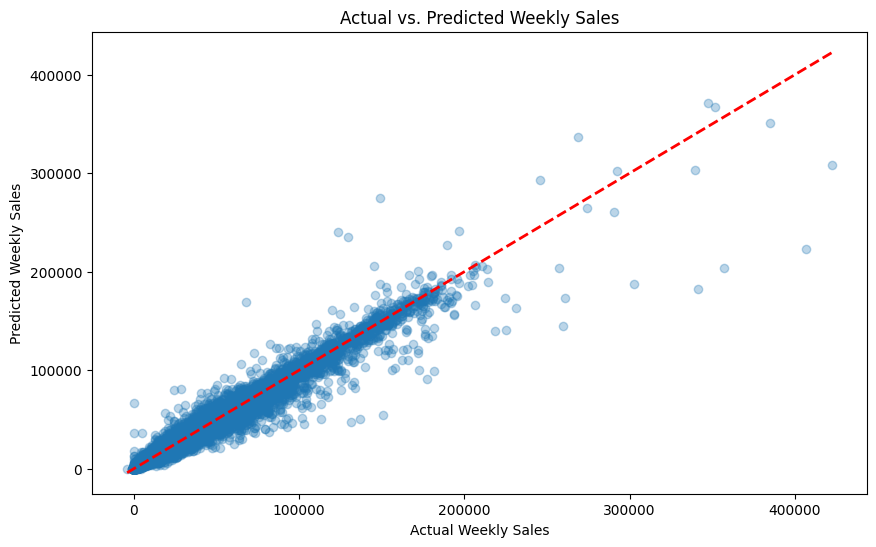

In [32]:

import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.3)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'r--', linewidth=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs. Predicted Weekly Sales')
plt.show()
